In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data preprocessing


#classifiers
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = []
# read the file line by line
with open(r'C:\Users\Nefeli\Desktop\dm_msc\DM_Homework2_2024\clustering\gauss_ring.txt', 'r') as file:
    for line in file:
        # Strip whitespace, split (by space)
        clean_line = line.strip().split()
        data.append((float(clean_line[0]), float(clean_line[1])))

# Create DataFrame from the list
main_df = pd.DataFrame(data, columns=['x', 'y'])
#rings3

In [3]:
filtered_df = main_df[(main_df['x'] > 1.5) & (main_df['y'] > 2)]
#print("\nFiltered DataFrame:")
#print(filtered_df)

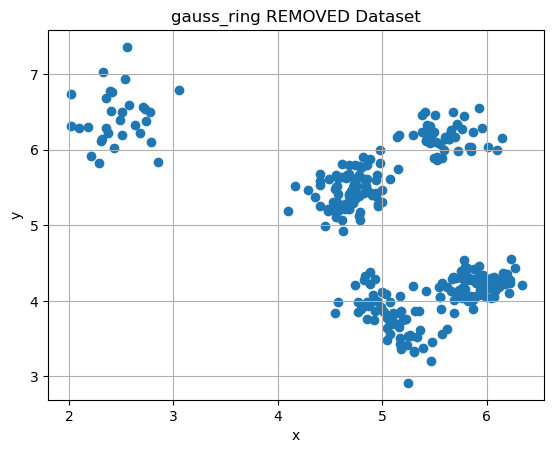

In [4]:
plt.scatter(filtered_df['x'], filtered_df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('gauss_ring REMOVED Dataset')
plt.grid(True)
plt.show()

In [8]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#range of k values to test
k = range(2, 11)

silhouette_scores = []

# get silhouette for each different k
for k_i in k:
    kmeans = KMeans(n_clusters=k_i, random_state=42)
    labels = kmeans.fit_predict(filtered_df)
    silhouette_avg = silhouette_score(filtered_df, labels)
    silhouette_scores.append(silhouette_avg)
    print("k = {} ----- Silhouette Score = {}".format(k_i,silhouette_avg))

# get best k (highest silhouette score)
best_k = k[np.argmax(silhouette_scores)]
print("Optimal number of clusters: {}".format(best_k))

k = 2 ----- Silhouette Score = 0.545586605629362
k = 3 ----- Silhouette Score = 0.6428619975712904
k = 4 ----- Silhouette Score = 0.6558345604482303
k = 5 ----- Silhouette Score = 0.659282504428192
k = 6 ----- Silhouette Score = 0.6331814037730035
k = 7 ----- Silhouette Score = 0.5436238545244042
k = 8 ----- Silhouette Score = 0.5046927592801369
k = 9 ----- Silhouette Score = 0.4331173524730854
k = 10 ----- Silhouette Score = 0.38182227268944924
Optimal number of clusters: 5


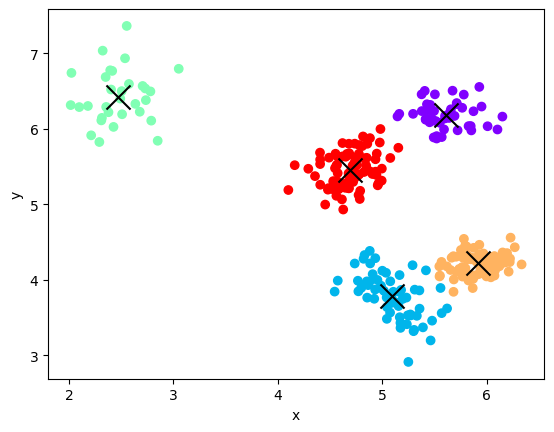

In [10]:
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(filtered_df)

# get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


plt.scatter(filtered_df['x'], filtered_df['y'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()